In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load dataset
df = pd.read_csv("creditcard.csv")  # Ensure correct file path

# Standardizing Features
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Splitting into Train & Test
y = df['Class']
X = df.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [3]:
from smote_oversampler import SMOTEOversampler
from sklearn.model_selection import StratifiedKFold

# Simulating stratified splitting to show we're preserving class ratio across parts
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f"Simulating Fold {fold+1}:")
    X_fold, y_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]

    # Apply SMOTE to this training fold (only using the first fold for simplicity)
    oversampler = SMOTEOversampler(sampling_strategy=0.5, random_state=42)
    resampled_df = oversampler.apply(X_fold, y_fold)

    # Stop after first fold to behave like original code
    break


In [ ]:
from custom_gan import CustomGAN

# Instantiate GAN with custom logging & architecture
gan = CustomGAN(epochs=100, batch_size=500, verbose=True)

# Train on the resampled dataset
gan.fit(resampled_df, discrete_columns=['Class'])

# Sample synthetic data
synthetic_data = gan.sample(len(X_train))


In [5]:
synthetic_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.771473,-0.860183,1.706103,-3.312960,1.873715,0.074417,-1.092225,-2.216295,0.321272,-2.805612,...,0.298638,1.223001,0.240498,-1.226156,-0.399953,1.165795,1.444305,0.133964,-0.350626,1
1,-1.695689,-1.932642,3.010649,-3.933635,8.049528,-1.289988,-2.031643,-3.491370,3.044045,-5.989263,...,0.775935,-0.305734,-0.094812,-0.837925,-0.482722,1.171028,3.702484,0.274308,-0.348245,1
2,1.624947,0.977580,-0.006042,-1.197058,0.185726,0.019652,-1.374644,-0.148953,-0.215413,1.905181,...,-0.267861,-0.789842,0.494864,1.267275,-0.780374,0.237468,-0.087720,-0.095887,-0.342237,0
3,-1.262749,-2.109835,5.265721,-11.728489,7.083532,-1.625497,-1.689862,-3.786432,2.441911,-5.865731,...,2.802943,1.219891,0.863187,-0.977942,-1.414576,-0.203740,3.816446,0.589564,-0.347155,1
4,-1.090699,-0.168176,0.490402,1.215951,0.627521,0.258082,-1.090897,0.119697,0.410352,0.362562,...,0.440415,0.194240,0.191291,0.943618,-2.763684,-0.236647,0.456870,0.510444,-0.319884,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,0.596188,-1.706945,3.965710,-3.967778,0.053340,1.097274,-2.002384,0.321807,0.757745,-1.004813,...,12.487488,-1.043575,-0.076551,-1.942282,0.607686,-0.679315,0.114980,0.618015,-0.352445,1
227841,-0.433847,-0.397153,-0.089578,1.110783,-2.230496,-0.422702,-0.338785,0.207290,-0.026262,0.025534,...,-0.032057,1.354217,-0.578135,0.206640,-0.149264,-0.054902,0.071396,0.119802,-0.344539,0
227842,-1.370776,-0.527332,0.061423,0.163923,0.009540,-0.483389,-0.491857,0.509150,-2.736742,3.209295,...,-0.182834,-2.344192,-0.236698,0.200659,-1.230495,-0.420265,0.425625,0.988261,-0.271973,0
227843,-0.480824,-0.904629,0.523458,-0.594182,0.918511,-1.138147,-0.555881,0.022165,1.185181,0.029647,...,1.208367,0.702476,0.050707,0.278831,0.320121,-0.167906,0.217868,0.058081,0.305049,1


/tmp/ipykernel_95751/2334606507.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(real_fraud.iloc[:, 0], label='Real Fraud', shade=True)
/tmp/ipykernel_95751/2334606507.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fake_fraud.iloc[:, 0], label='Fake Fraud', shade=True, linestyle='dashed')


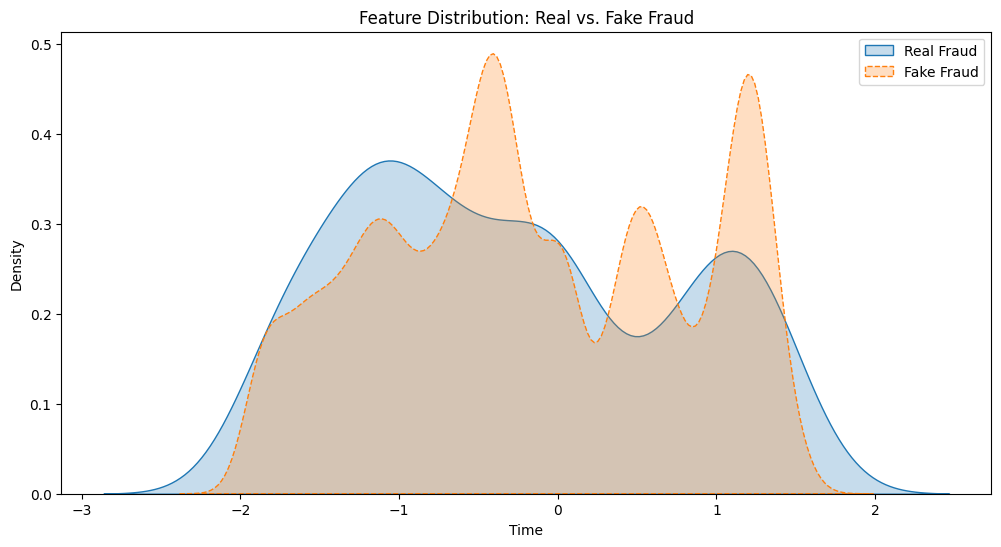

In [6]:
synthetic_data=pd.read_csv("smote_synthetic_data.csv")
resampled_df=pd.read_csv("smote_resampled_data.csv")
# Separate Real & Fake Fraud Samples
real_fraud = df[df['Class'] == 1]
fake_fraud = synthetic_data[synthetic_data['Class'] == 1]

# Distribution Comparison
plt.figure(figsize=(12, 6))
sns.kdeplot(real_fraud.iloc[:, 0], label='Real Fraud', shade=True)
sns.kdeplot(fake_fraud.iloc[:, 0], label='Fake Fraud', shade=True, linestyle='dashed')
plt.title("Feature Distribution: Real vs. Fake Fraud")
plt.legend()
plt.show()


In [7]:
d1=pd.read_csv("creditcard.csv")
d2=pd.read_csv("smote_resampled_data.csv")
d3=pd.read_csv("smote_synthetic_data.csv")

In [12]:
print(d1.shape)
print(d2.shape)
print(d3.shape)

(284807, 31)
(341176, 31)
(227845, 31)


In [14]:
from model_trainer import ModelTrainer
from evaluate_mcnemar import perform_mcnemars_test


In [ ]:
trainer = ModelTrainer()
results = trainer.train(X_train, y_train, X_test, y_test, synthetic_data)

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize empty results dict
results = {
    "original": {},
    "augmented": {}
}

# Training function for a single model
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test, results_key):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"🔹 {model_name} ({results_key}) - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results[results_key][model_name] = {
        "model": model,
        "accuracy": acc,
        "f1_score": f1,
        "y_pred": y_pred
    }

# You need to define your X_train, y_train, X_test, y_test, synthetic_data before this



In [20]:
from sklearn.ensemble import RandomForestClassifier

# Original data
train_and_evaluate(RandomForestClassifier(), "RandomForest", X_train, y_train, X_test, y_test, "original")

# Augmented data
if synthetic_data is not None:
    X_synth = synthetic_data.drop(columns=["Class"])
    y_synth = synthetic_data["Class"]
    X_aug = pd.concat([X_train, X_synth], axis=0)
    y_aug = pd.concat([y_train, y_synth], axis=0)
    train_and_evaluate(RandomForestClassifier(), "RandomForest", X_aug, y_aug, X_test, y_test, "augmented")


🔹 RandomForest (original) - Accuracy: 0.9996, F1 Score: 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

🔹 RandomForest (augmented) - Accuracy: 0.9985, F1 Score: 0.9986
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.89      0.66        98

    accuracy                           1.00     56962
   macro avg       0.77      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
from sklearn.linear_model import LogisticRegression

# Original data
train_and_evaluate(LogisticRegression(max_iter=1000), "LogisticRegression", X_train, y_train, X_test, y_test, "original")

# Augmented data
if synthetic_data is not None:
    X_synth = synthetic_data.drop(columns=["Class"])
    y_synth = synthetic_data["Class"]
    X_aug = pd.concat([X_train, X_synth], axis=0)
    y_aug = pd.concat([y_train, y_synth], axis=0)
    train_and_evaluate(LogisticRegression(max_iter=1000), "LogisticRegression", X_aug, y_aug, X_test, y_test, "augmented")


🔹 LogisticRegression (original) - Accuracy: 0.9992, F1 Score: 0.9991
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

🔹 LogisticRegression (augmented) - Accuracy: 0.9919, F1 Score: 0.9947
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.89      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
from sklearn.svm import SVC

# Original data
train_and_evaluate(SVC(probability=True), "SVM", X_train, y_train, X_test, y_test, "original")

# Augmented data
if synthetic_data is not None:
    X_synth = synthetic_data.drop(columns=["Class"])
    y_synth = synthetic_data["Class"]
    X_aug = pd.concat([X_train, X_synth], axis=0)
    y_aug = pd.concat([y_train, y_synth], axis=0)
    train_and_evaluate(SVC(probability=True), "SVM", X_aug, y_aug, X_test, y_test, "augmented")


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Original data
train_and_evaluate(KNeighborsClassifier(), "KNN", X_train, y_train, X_test, y_test, "original")

# Augmented data
if synthetic_data is not None:
    X_synth = synthetic_data.drop(columns=["Class"])
    y_synth = synthetic_data["Class"]
    X_aug = pd.concat([X_train, X_synth], axis=0)
    y_aug = pd.concat([y_train, y_synth], axis=0)
    train_and_evaluate(KNeighborsClassifier(), "KNN", X_aug, y_aug, X_test, y_test, "augmented")


🔹 KNN (original) - Accuracy: 0.9995, F1 Score: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

🔹 KNN (augmented) - Accuracy: 0.9995, F1 Score: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.86      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Original data
train_and_evaluate(GradientBoostingClassifier(), "GradientBoosting", X_train, y_train, X_test, y_test, "original")

# Augmented data
if synthetic_data is not None:
    X_synth = synthetic_data.drop(columns=["Class"])
    y_synth = synthetic_data["Class"]
    X_aug = pd.concat([X_train, X_synth], axis=0)
    y_aug = pd.concat([y_train, y_synth], axis=0)
    train_and_evaluate(GradientBoostingClassifier(), "GradientBoosting", X_aug, y_aug, X_test, y_test, "augmented")


🔹 GradientBoosting (original) - Accuracy: 0.9983, F1 Score: 0.9979
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962

🔹 GradientBoosting (augmented) - Accuracy: 0.9955, F1 Score: 0.9967
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.89      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.94      0.70     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
import pandas as pd

# Train on original data
print("\n🔹 XGBoost - Original Data")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Accuracy: {acc_xgb:.4f}, F1 Score: {f1_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Train on augmented data
if synthetic_data is not None:
    print("\n🟢 XGBoost - Augmented Data")
    X_synth = synthetic_data.drop(columns=["Class"])
    y_synth = synthetic_data["Class"]
    X_aug = pd.concat([X_train, X_synth], axis=0)
    y_aug = pd.concat([y_train, y_synth], axis=0)

    xgb_model_aug = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_model_aug.fit(X_aug, y_aug)
    y_pred_xgb_aug = xgb_model_aug.predict(X_test)

    acc_xgb_aug = accuracy_score(y_test, y_pred_xgb_aug)
    f1_xgb_aug = f1_score(y_test, y_pred_xgb_aug, average='weighted')

    print(f"Accuracy: {acc_xgb_aug:.4f}, F1 Score: {f1_xgb_aug:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_xgb_aug))



🔹 XGBoost - Original Data


/home/dinesh/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:42:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9995, F1 Score: 0.9995
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


🟢 XGBoost - Augmented Data


/home/dinesh/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:42:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9987, F1 Score: 0.9989
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.59      0.87      0.70        98

    accuracy                           1.00     56962
   macro avg       0.80      0.93      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:

# Use helper functions
#from evaluate_metrics import evaluate_all_models
from evaluate_confusion import show_all_confusion_matrices
from plot_pr_curve import plot_precision_recall_curves


ImportError: cannot import name 'show_all_confusion_matrices' from 'evaluate_confusion' (/home/dinesh/Desktop/BTP/MAIN 2/evaluate_confusion.py)

In [ ]:
evaluate_all_models(y_test, results)


In [26]:
show_all_confusion_matrices(y_test, results)


NameError: name 'show_all_confusion_matrices' is not defined

In [ ]:
plot_precision_recall_curves(y_test, X_test, results)


In [ ]:
# McNemar’s test
perform_mcnemars_test(y_test, y_pred_original, y_pred_augmented)
